In [27]:
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('/Users/balbi/Downloads/pyMorfologik-master'))
if module_path not in sys.path:
    sys.path.append(module_path)
from pymorfologik import Morfologik
from pymorfologik.parsing import ListParser

import numpy as np
from __future__ import print_function
import string

import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
result_df = pd.read_csv('FilmWeb-movies_reviews-analysis-dictParser.csv')
result_df = result_df.reset_index()
result_df['correct_guess'] = result_df['detectedEmotion'] == result_df['emotion']

In [175]:
def get_length(text):
    return len(text)

def get_length_bin(length):
    return round(length / 100)

def get_score(result):
    return 1 if result else 0

def prepereDataForPlot(result_df):
    result_df.loc[result_df.detectedEmotion == 'neutral', 'detectedEmotion'] = "negative"
    result_df['score'] = map(get_score, result_df['correct_guess'])
    #create group with 10 elements
    result_df['text_length_bin'] = map(get_length_bin, result_df['words'])    
    return result_df

In [208]:
def createPlotTextLength(result_df):
    # data to plot
    n_groups = round(result_df['text_length_bin'].max())
    
    grouped = result_df.groupby('text_length_bin', as_index=False).mean()
    sum_elements = grouped.words
    means_words = grouped.words/sum_elements
    means_lemmatisation = grouped.wordsAfterLemmatisation/sum_elements
    means_emotions = grouped.wordsFound/sum_elements

    # create plot
    fig, ax = plt.subplots()
    index = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11.]
    bar_width = 0.35
    opacity = 0.5

    rects1 = plt.bar(index, means_words, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index, means_lemmatisation, bar_width,
                 alpha=opacity,
                 color='g')
    
    rects2 = plt.bar(index, means_emotions, bar_width,
                 alpha=opacity,
                 color='c')

    plt.xlabel('Lenght of text')
    plt.ylabel('Percent')
    #plt.title('Scores by person')
    plt.xticks(index)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [177]:
def createPlotRates(result_df):
    # data to plot
    result_df = result_df.round({'rate': 0})
    n_groups = result_df.rate.max()
    
    grouped = result_df.groupby('rate', as_index=False).mean()
    means_words = grouped.words/grouped.words
    means_lemmatisation = grouped.wordsAfterLemmatisation/grouped.words
    means_emotions = grouped.wordsFound/grouped.words

    # create plot
    fig, ax = plt.subplots()
    index = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]
    bar_width = 0.35
    opacity = 0.5

    rects1 = plt.bar(index, means_words, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index, means_lemmatisation, bar_width,
                 alpha=opacity,
                 color='g')
    
    rects2 = plt.bar(index, means_emotions, bar_width,
                 alpha=opacity,
                 color='c')

    plt.xlabel('Rates')
    plt.ylabel('Percent')
    #plt.title('Scores by person')
    plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [178]:
def createPlotByScore(data):
    grouped = data.groupby('words', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.words
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Lenght of text')
    plt.ylabel('Efficacy')
    
    fig.show()

In [179]:
#zaleznosc oceny od wykrytej emocji
def createPlotByRate(data):
    data = data.round({'rate': 0})   
    grouped = data.groupby('rate', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.rate
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Rate')
    plt.ylabel('Efficacy')

    fig.show()

In [180]:
def createPlotByWordsFound(result):
    grouped = result.groupby('wordsFound', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.wordsFound
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)

    plt.xlabel('Found words in Slowosiec')
    plt.ylabel('Efficacy')
    
    fig.show()

In [181]:
def changeRangeOfComments(maximumNegativeRate, mimimumPositiveRate, comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [182]:
def getResults(result_df):
    return result_df.groupby('correct_guess').size()

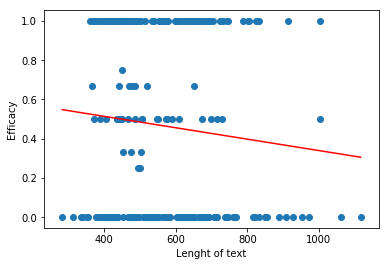

In [185]:
createPlotByScore(result_df)

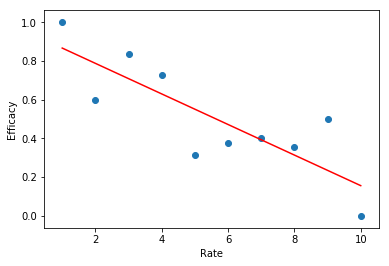

In [186]:
createPlotByRate(result_df)

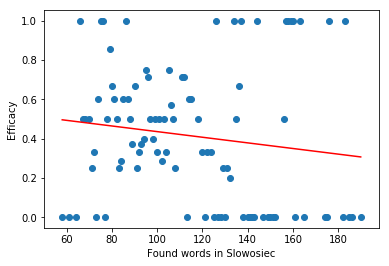

In [187]:
createPlotByWordsFound(result_df)

In [188]:
getResults(result_df)

correct_guess
False    173
True     146
dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

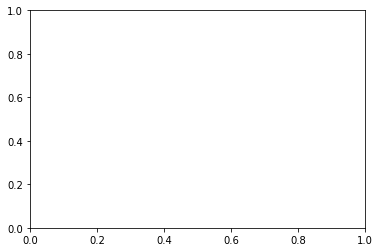

In [209]:
createPlotTextLength(result_df)

In [184]:
result_df = prepereDataForPlot(result_df)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

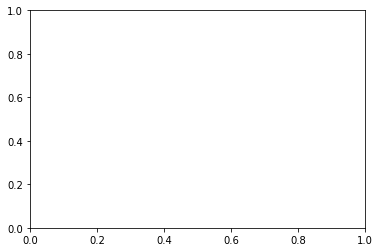

In [169]:
createPlotRates(result_df)

In [191]:
def devide(number):
    return number/2

def moreThenHalf(result_df):
    result_df['half_wordsAfterLemmatisation'] = map(devide, result_df['wordsAfterLemmatisation'])
    result_df['moreThenHalf'] = 0
    result_df['moreThenHalf'] = np.where(((result_df['wordsFound'] >= result_df['half_wordsAfterLemmatisation']) & (result_df['half_wordsAfterLemmatisation'] > 0) & (result_df['wordsFound'] > 0)), 1 , 0)
    return result_df

In [192]:
tym = moreThenHalf(result_df)
tym.groupby('moreThenHalf').size()
review_less = tym.loc[tym['moreThenHalf'] == 1]
review_less['correct_guess'] = review_less['detectedEmotion'] == review_less['emotion']
review_less.groupby('correct_guess').size()

Series([], dtype: int64)

In [196]:
result = result_df.round({'rate': 0})
grouped = result.groupby('rate', as_index=False).mean()

In [197]:
grouped

,rate,index,resultOfDetecting,words,wordsAfterLemmatisation,wordsFound,correct_guess,score,text_length_bin,half_wordsAfterLemmatisation,moreThenHalf
0,1.0,193.000000,-0.075253,417.000000,286.000000,95.000000,1.000000,1.000000,4.000000,143.000000,0.0
1,2.0,116.000000,-0.000105,521.600000,330.000000,97.000000,0.600000,0.600000,5.400000,165.000000,0.0
2,3.0,162.838710,-0.030623,564.258065,358.677419,109.709677,0.838710,0.838710,5.645161,179.338710,0.0
3,4.0,151.606061,-0.021199,526.090909,326.969697,96.696970,0.727273,0.727273,5.242424,163.484848,0.0
4,5.0,135.018519,-0.020660,538.907407,339.000000,99.259259,0.314815,0.314815,5.407407,169.500000,0.0
5,6.0,161.378788,-0.008561,527.030303,337.909091,103.075758,0.378788,0.378788,5.287879,168.954545,0.0
6,7.0,178.360000,-0.009333,555.386667,347.266667,104.533333,0.400000,0.400000,5.546667,173.633333,0.0
7,8.0,157.844444,-0.013054,617.711111,391.044444,120.355556,0.355556,0.355556,6.200000,195.522222,0.0
8,9.0,174.250000,-0.014519,568.250000,359.125000,110.875000,0.500000,0.500000,5.875000,179.562500,0.0
9,10.0,81.000000,-0.016995,889.000000,554.000000,186.000000,0.000000,0.000000,9.000000,277.000000,0.0


In [190]:
round(result_df['text_length_bin'].max())

11.0

In [195]:
result_df

,index,detectedEmotion,emotion,lemmatisation,rate,resultOfDetecting,text,words,wordsAfterLemmatisation,wordsFound,correct_guess,score,text_length_bin,half_wordsAfterLemmatisation,moreThenHalf
0,0,positive,positive,"[kręcić, zwrot, wykazać, sukces, ale, praktycz...",7.0,0.020752,"To zdumiewające, jak bardzo zmieniło się w ost...",450.0,285.0,95.0,True,1,5.0,142.5,0
1,1,negative,positive,"[książka, intryga, igra, go, czytać, łazienka,...",7.0,-0.014083,"""Niskie"" jeszcze nigdy nie było niżej, a ""wyso...",499.0,318.0,90.0,False,0,5.0,159.0,0
2,2,negative,positive,"[mały, można, powód, ale, być, śmierć, eksploa...",7.0,-0.060137,"Trudno pozbyć się myśli, że jednym z formujący...",818.0,509.0,138.0,False,0,8.0,254.5,0
3,3,positive,positive,"[sprawiać, wykreować, rozwiązanie, wyjrzeć, do...",7.0,0.005440,Reżyserowanie filmu na podstawie własnej powie...,552.0,351.0,99.0,True,1,6.0,175.5,0
4,4,positive,negative,"[altruizm, się, gdy, słownik, ale, papieski, o...",4.0,0.062729,Tajemnica rozwiązana. Bóg mieszka w słonecznej...,335.0,234.0,67.0,False,0,3.0,117.0,0
5,5,negative,negative,"[przykleić, nowa, dobrze, być, narkotyk, lepsz...",4.0,-0.001232,"W Stanach Zjednoczonych ""Złe psy"" zaledwie prz...",386.0,266.0,78.0,True,1,4.0,133.0,0
6,6,negative,negative,"[chciwość, gatunek, słaby, kupować, dobrze, al...",4.0,-0.080467,"Do wszystkich gringos: mamy narkobiznes, obcin...",634.0,399.0,122.0,True,1,6.0,199.5,0
7,7,negative,positive,"[sprawiać, można, bowiem, dobrze, kolejny, gat...",5.0,-0.066667,Gatunek horroru można czytać jako ciąg przestr...,623.0,370.0,99.0,False,0,6.0,185.0,0
8,8,negative,positive,"[zawiedziony, zwodzić, ale, przekształcać, prz...",8.0,-0.008750,"Zapnijcie pasy, chwyćcie się poręczy i uważajc...",414.0,280.0,80.0,False,0,4.0,140.0,0
9,9,negative,positive,"[sprawiać, inteligent, stół, ale, dużo, żona, ...",8.0,-0.036912,"Jedyny w okolicy uczciwy człowiek, który w dus...",485.0,326.0,102.0,False,0,5.0,163.0,0
